In [1]:
#데이터 구성
import pandas as pd

#행렬 연산
import numpy as np

#데이터 시각화
import matplotlib; import matplotlib.pyplot as plt

#데이터 시각화 산점도 행렬, 추세
import seaborn as sns

#scale 변환 평균 표준편차 기준
from sklearn.preprocessing import StandardScaler


#주성분 분석
from sklearn.decomposition import PCA

#회귀 분석
import statsmodels.api as sm

#폰트적용
matplotlib.rc('font', family="NanumBarunGothic")

# 1. 데이터 구성하기

## 데이터 불러오기

In [2]:
#파일 불러오기
users=pd.read_csv('//home/piai/바탕화면/cvs_users.csv',encoding='cp949')
weather=pd.read_csv('//home/piai/바탕화면/cvs_weather.csv',encoding='cp949')
sales=pd.read_csv('//home/piai/바탕화면/cvs_sales.csv',encoding='cp949')
items=pd.read_csv('//home/piai/바탕화면/cvs_items.csv',encoding='cp949')

## 데이터 전처리

### user 

In [3]:
users.head(10)

,idUser,Gender,AgeGroup,UserYear
0,U100001,남성,40대,2020
1,U100001,남성,40대,2021
2,U100002,여성,30대,2020
3,U100002,여성,30대,2021
4,U100003,남성,30대,2020
5,U100003,남성,30대,2021
6,U100004,남성,30대,2020
7,U100004,남성,30대,2021
8,U100005,여성,30대,2020
9,U100005,여성,30대,2021


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122 entries, 0 to 2121
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   idUser    2122 non-null   object
 1   Gender    2122 non-null   object
 2   AgeGroup  2122 non-null   object
 3   UserYear  2122 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 66.4+ KB


In [5]:
users.isnull().sum()

idUser      0
Gender      0
AgeGroup    0
UserYear    0
dtype: int64

<AxesSubplot:>

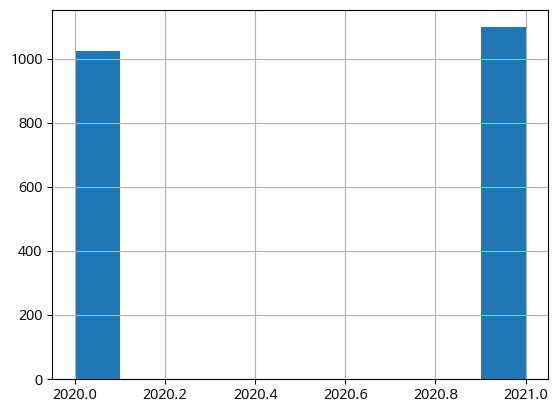

In [6]:
users['UserYear'].hist()

<AxesSubplot:>

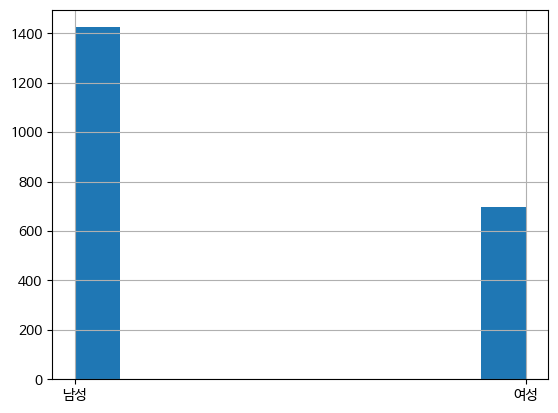

In [7]:
users['Gender'].hist()

<AxesSubplot:>

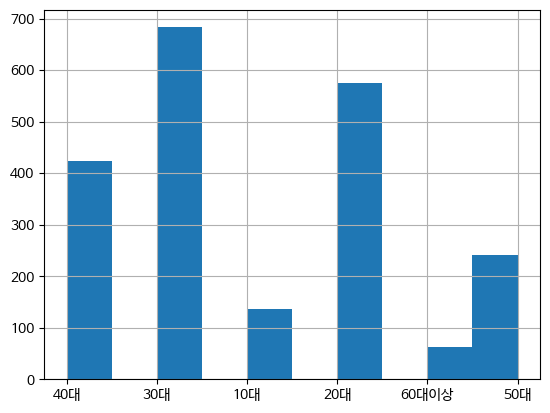

In [8]:
users['AgeGroup'].hist()

In [9]:
#user 변수 정리 - UserYear
users=users.drop('UserYear', axis=1)
users=users.drop_duplicates()
users.head()

,idUser,Gender,AgeGroup
0,U100001,남성,40대
2,U100002,여성,30대
4,U100003,남성,30대
6,U100004,남성,30대
8,U100005,여성,30대


# weather

In [10]:
weather.head()

,AreaId,Area,dateObs,TempAvg,TempMin,hhmiTempMin,TempMax,hhmiTempMax,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,hhmiSnowloadMax
0,108,서울,2020-01-01,-2.2,-6.5,1,0.3,1457,9.83,0.1,64.4,0.0,NaN
1,108,서울,2020-01-02,1.0,-0.7,1,3.8,1500,NaN,NaN,65.4,NaN,NaN
2,108,서울,2020-01-03,-0.1,-3.4,807,4.6,1547,NaN,NaN,56.9,NaN,NaN
3,108,서울,2020-01-04,1.2,-2.8,512,6.1,1450,NaN,NaN,50.8,NaN,NaN
4,108,서울,2020-01-05,1.3,-3.2,821,6.6,1453,NaN,NaN,45.6,NaN,NaN


In [11]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AreaId           731 non-null    int64  
 1   Area             731 non-null    object 
 2   dateObs          731 non-null    object 
 3   TempAvg          731 non-null    float64
 4   TempMin          731 non-null    float64
 5   hhmiTempMin      731 non-null    int64  
 6   TempMax          731 non-null    float64
 7   hhmiTempMax      731 non-null    int64  
 8   hourRainfall     311 non-null    float64
 9   RainfallAmount   311 non-null    float64
 10  HumidAvg         731 non-null    float64
 11  SnowloadMax      24 non-null     float64
 12  hhmiSnowloadMax  19 non-null     float64
dtypes: float64(8), int64(3), object(2)
memory usage: 74.4+ KB


In [12]:
weather.isnull().sum()

AreaId               0
Area                 0
dateObs              0
TempAvg              0
TempMin              0
hhmiTempMin          0
TempMax              0
hhmiTempMax          0
hourRainfall       420
RainfallAmount     420
HumidAvg             0
SnowloadMax        707
hhmiSnowloadMax    712
dtype: int64

In [13]:
weather[['hourRainfall','RainfallAmount','SnowloadMax','hhmiSnowloadMax']] = \
weather[['hourRainfall','RainfallAmount','SnowloadMax','hhmiSnowloadMax']].fillna(0)

<AxesSubplot:>

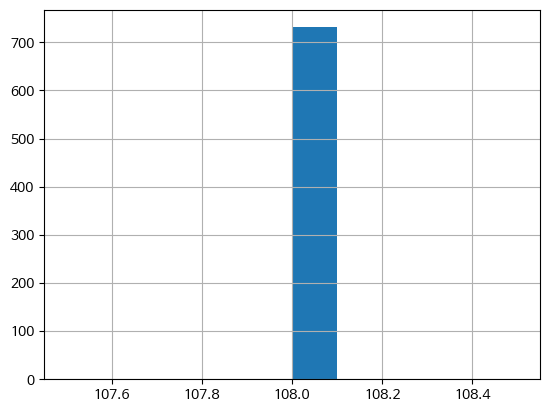

In [14]:
weather['AreaId'].hist()

<AxesSubplot:>

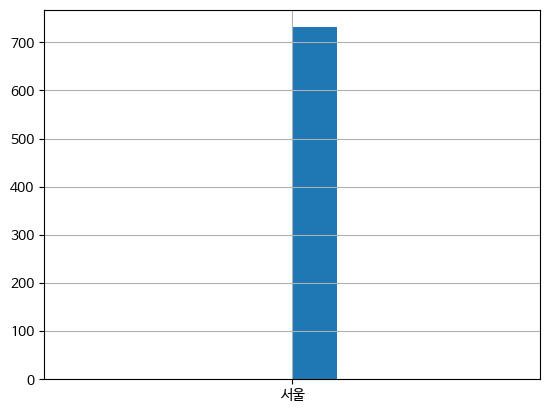

In [15]:
weather['Area'].hist()

<AxesSubplot:>

/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


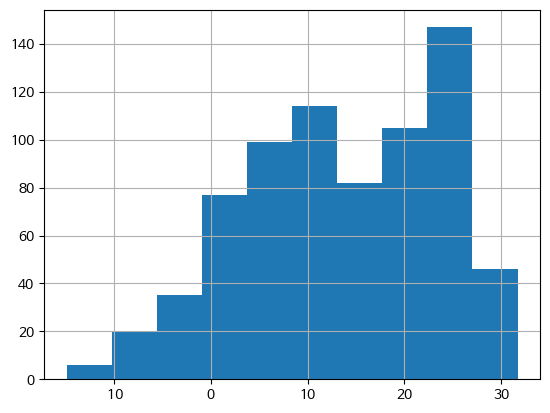

In [16]:
weather['TempAvg'].hist()

<AxesSubplot:>

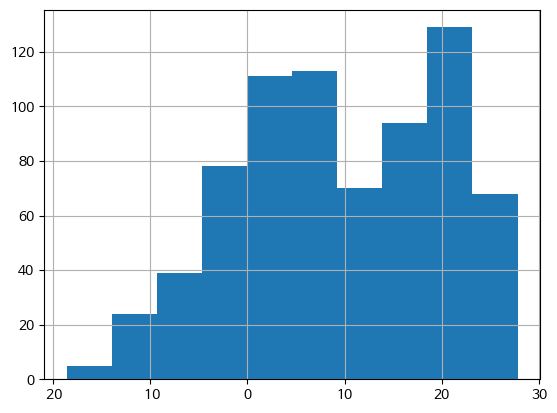

In [17]:
weather['TempMin'].hist()

<AxesSubplot:>

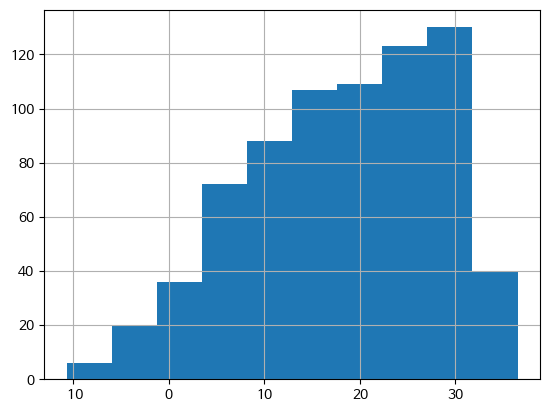

In [18]:
weather['TempMax'].hist()

<AxesSubplot:>

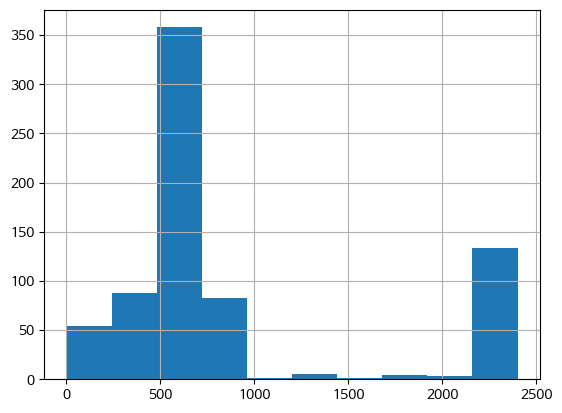

In [19]:
weather['hhmiTempMin'].hist()

In [20]:
weather['hhmiTempMin'] > 1200

0      False
1      False
2      False
3      False
4      False
       ...  
726    False
727    False
728    False
729    False
730    False
Name: hhmiTempMin, Length: 731, dtype: bool

<AxesSubplot:>

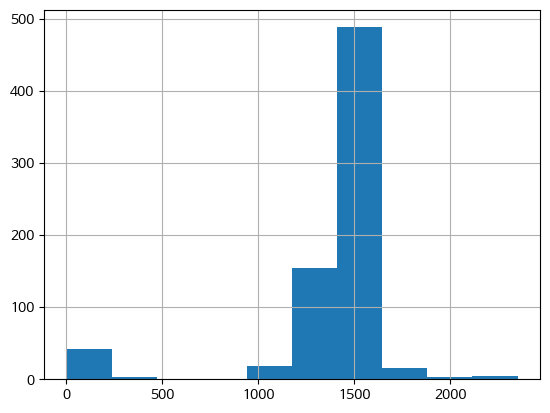

In [21]:
weather['hhmiTempMax'].hist()

<AxesSubplot:>

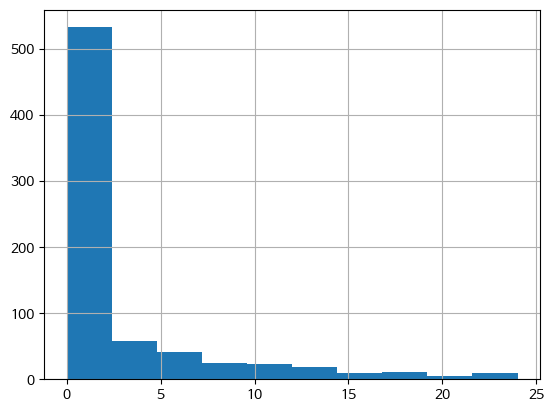

In [22]:
weather['hourRainfall'].hist()

<AxesSubplot:>

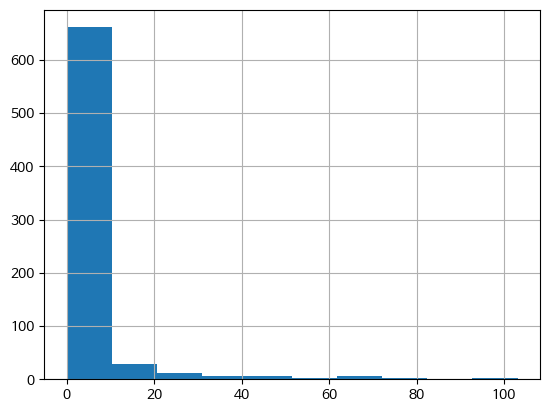

In [23]:
weather['RainfallAmount'].hist()

<AxesSubplot:>

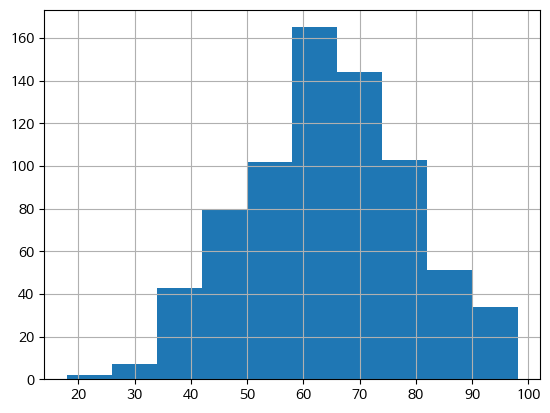

In [24]:
weather['HumidAvg'].hist()

<AxesSubplot:>

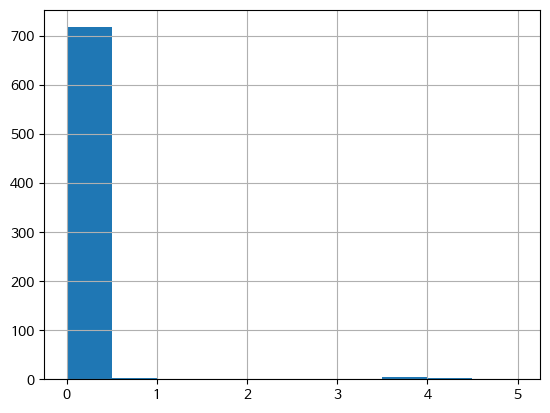

In [25]:
weather['SnowloadMax'].hist()

<AxesSubplot:>

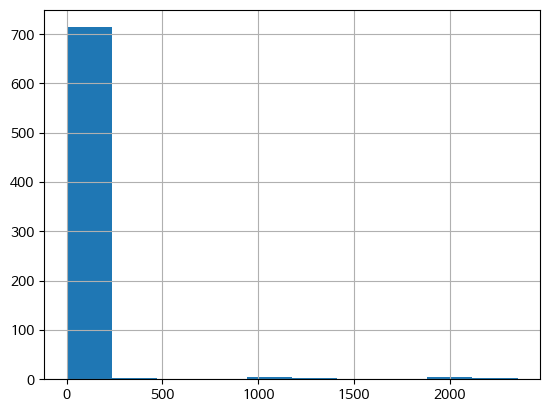

In [26]:
weather['hhmiSnowloadMax'].hist()

In [27]:
weather = weather.drop(['AreaId','Area','SnowloadMax',
                        'hhmiSnowloadMax','hhmiTempMin','hhmiTempMax'],axis=1)

In [28]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   dateObs         731 non-null    object 
 1   TempAvg         731 non-null    float64
 2   TempMin         731 non-null    float64
 3   TempMax         731 non-null    float64
 4   hourRainfall    731 non-null    float64
 5   RainfallAmount  731 non-null    float64
 6   HumidAvg        731 non-null    float64
dtypes: float64(6), object(1)
memory usage: 40.1+ KB


# sales

In [29]:
sales.head()

,idUser,idPOS,SalesDT,SalesDate,SalesYear,SalesYearMonth,SalesMonth,SalesDow,SalesHour,ItemId,ItemName
0,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8801007795751,CJ)고메모짜돈카츠450g
1,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8801056170059,롯)칠성사이다복숭아P500
2,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8809640112157,PSK)스윗사파이어포도400g
3,U100001,U100001-POS2020-10004,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,19,I-8801045611211,오뚜기)물엿700g
4,U100001,U100001-POS2020-10004,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,19,I-8809253648470,22del)헤이즐넛향1L


In [30]:
sales.isnull().sum()

idUser            0
idPOS             0
SalesDT           0
SalesDate         0
SalesYear         0
SalesYearMonth    0
SalesMonth        0
SalesDow          0
SalesHour         0
ItemId            0
ItemName          0
dtype: int64

# items

In [31]:
items.head()

,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemId,ItemName,Item_CatORMaker,Price,ImageUrl
0,L1,간편식사,M1,도시락,I-8801068371857,샐)치킨찹찹샐러드,샐러드,3500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
1,L1,간편식사,M1,도시락,I-8801068371864,샐)퀴노아바질샐러드,샐러드,3500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
2,L1,간편식사,M1,도시락,I-8801068378887,샐)에그가먼저닭샐러드,샐러드,3500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
3,L1,간편식사,M1,도시락,I-8801068388664,샐)흑임자치킨샐러드,샐러드,3500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
4,L1,간편식사,M1,도시락,I-8801068389340,면)나폴리탄파스타,면,4000,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...


In [32]:
items.isnull().sum()

ItemIdLarge         0
ItemNameLarge       0
ItemIdMiddle        0
ItemNameMiddle      0
ItemId              0
ItemName            0
Item_CatORMaker    17
Price               0
ImageUrl            0
dtype: int64

In [33]:
items[items['Item_CatORMaker'].isnull()==True]

,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemId,ItemName,Item_CatORMaker,Price,ImageUrl
589,L3,과자류,M1,스낵/비스켓,I-8801062879090,ABC초코쿠키쿠앤크,NaN,1000,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
1396,L3,과자류,M3,껌/초콜릿/캔디,I-2201148612355,푸쉬팝캔디,NaN,1200,http://cdn2.bgfretail.com/bgfbrand/files/produ...
1457,L3,과자류,M3,껌/초콜릿/캔디,I-6934290104152,주사위팝33g,NaN,1200,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
1668,L3,과자류,M3,껌/초콜릿/캔디,I-8804973306204,몰티져스밀크37g,NaN,1500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
1676,L3,과자류,M3,껌/초콜릿/캔디,I-8809008810022,리얼딸기초코볼,NaN,2500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
1847,L4,아이스크림,M1,아이스크림,I-8801062422838,본젤라또치즈베리콘,NaN,2000,http://cdn2.bgfretail.com/bgfbrand/files/produ...
3076,L5,식품,M3,식재료,I-2201148613918,바나나2입,NaN,1300,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
3077,L5,식품,M3,식재료,I-2201148614045,세척사과,NaN,1500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
3078,L5,식품,M3,식재료,I-2201148614274,바나나1입,NaN,700,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
3569,L6,음료,M1,음료,I-4005906404835,파워오투오렌지레몬,NaN,2100,http://cdn2.bgfretail.com/bgfbrand/files/produ...


In [34]:
#cu상품목록을 찾아본 봐 이름이랑 똑같기 때문에 제거
items= items.drop(['Item_CatORMaker'],axis=1)

In [35]:
items.isnull().sum()

ItemIdLarge       0
ItemNameLarge     0
ItemIdMiddle      0
ItemNameMiddle    0
ItemId            0
ItemName          0
Price             0
ImageUrl          0
dtype: int64

In [36]:
items["Price"].quantile(0.75)

3700.0

In [37]:
items.describe()

,Price
count,4308.000000
mean,3073.454039
std,2761.728663
min,200.000000
25%,1500.000000
50%,2200.000000
75%,3700.000000
max,52000.000000


In [38]:
len(items[items['Price']>3700])

1066

<AxesSubplot:>

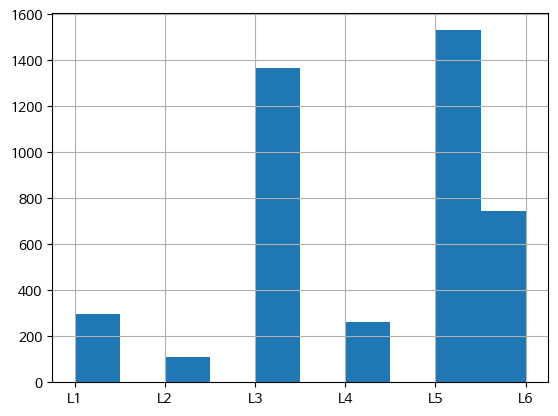

In [39]:
items['ItemIdLarge'].hist()

<AxesSubplot:>

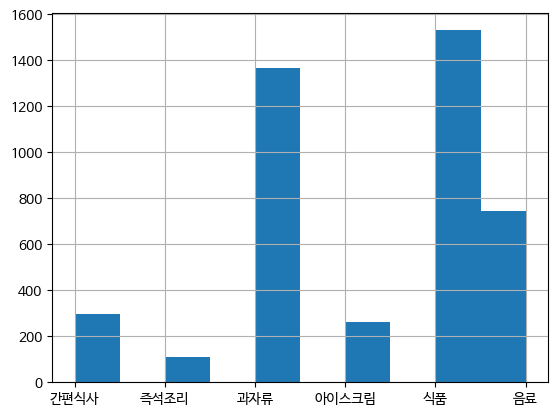

In [40]:
items['ItemNameLarge'].hist()

<AxesSubplot:>

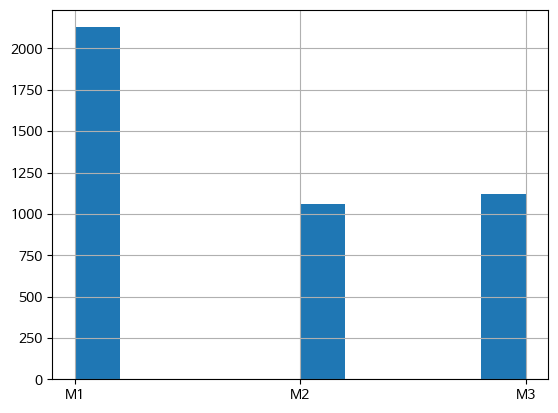

In [41]:
items['ItemIdMiddle'].hist()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

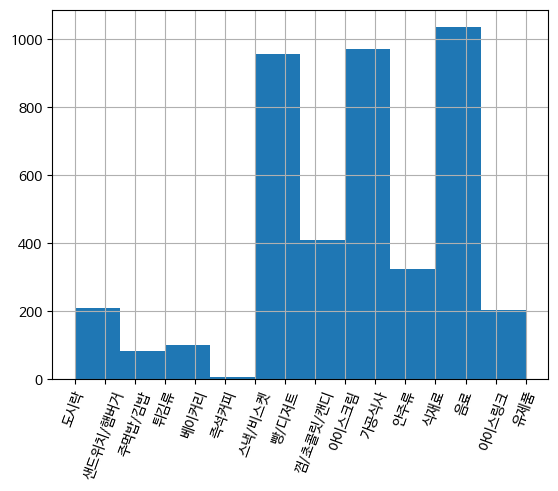

In [42]:
items['ItemNameMiddle'].hist()
plt.xticks(rotation=70)

<AxesSubplot:>

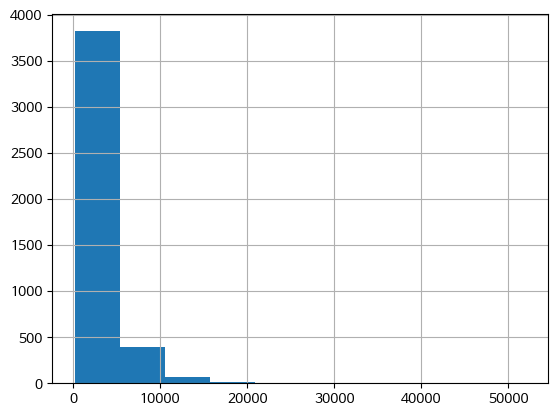

In [43]:
items['Price'].hist()

In [44]:
items= items.drop('ImageUrl',axis=1)

In [45]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ItemIdLarge     4308 non-null   object
 1   ItemNameLarge   4308 non-null   object
 2   ItemIdMiddle    4308 non-null   object
 3   ItemNameMiddle  4308 non-null   object
 4   ItemId          4308 non-null   object
 5   ItemName        4308 non-null   object
 6   Price           4308 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 235.7+ KB


## 데이터 결합하기

In [46]:
df=sales.merge(users, on='idUser', how='left')
df.head()

,idUser,idPOS,SalesDT,SalesDate,SalesYear,SalesYearMonth,SalesMonth,SalesDow,SalesHour,ItemId,ItemName,Gender,AgeGroup
0,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8801007795751,CJ)고메모짜돈카츠450g,남성,40대
1,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8801056170059,롯)칠성사이다복숭아P500,남성,40대
2,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8809640112157,PSK)스윗사파이어포도400g,남성,40대
3,U100001,U100001-POS2020-10004,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,19,I-8801045611211,오뚜기)물엿700g,남성,40대
4,U100001,U100001-POS2020-10004,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,19,I-8809253648470,22del)헤이즐넛향1L,남성,40대


In [47]:
df=df.merge(items, on='ItemId', how='left')
df.head()

,idUser,idPOS,SalesDT,SalesDate,SalesYear,SalesYearMonth,SalesMonth,SalesDow,SalesHour,ItemId,ItemName_x,Gender,AgeGroup,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemName_y,Price
0,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8801007795751,CJ)고메모짜돈카츠450g,남성,40대,L5,식품,M1,가공식사,CJ)고메모짜돈카츠450g,10000
1,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8801056170059,롯)칠성사이다복숭아P500,남성,40대,L6,음료,M1,음료,롯)칠성사이다복숭아P500,2200
2,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8809640112157,PSK)스윗사파이어포도400g,남성,40대,L5,식품,M3,식재료,PSK)스윗사파이어포도400g,6800
3,U100001,U100001-POS2020-10004,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,19,I-8801045611211,오뚜기)물엿700g,남성,40대,L5,식품,M3,식재료,오뚜기)물엿700g,3000
4,U100001,U100001-POS2020-10004,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,19,I-8809253648470,22del)헤이즐넛향1L,남성,40대,L6,음료,M2,아이스링크,22del)헤이즐넛향1L,3500


In [48]:
df = df.drop('ItemName_y',axis=1)
df = df.rename(columns={'ItemName_x':'ItemName'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510223 entries, 0 to 510222
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   idUser          510223 non-null  object
 1   idPOS           510223 non-null  object
 2   SalesDT         510223 non-null  object
 3   SalesDate       510223 non-null  object
 4   SalesYear       510223 non-null  int64 
 5   SalesYearMonth  510223 non-null  object
 6   SalesMonth      510223 non-null  int64 
 7   SalesDow        510223 non-null  object
 8   SalesHour       510223 non-null  int64 
 9   ItemId          510223 non-null  object
 10  ItemName        510223 non-null  object
 11  Gender          510223 non-null  object
 12  AgeGroup        510223 non-null  object
 13  ItemIdLarge     510223 non-null  object
 14  ItemNameLarge   510223 non-null  object
 15  ItemIdMiddle    510223 non-null  object
 16  ItemNameMiddle  510223 non-null  object
 17  Price           510223 non-nu

In [49]:
weather.rename(columns={'dateObs':'SalesDate'}, inplace=True)

In [50]:
df=df.merge(weather, on='SalesDate', how='left')
df.head()

,idUser,idPOS,SalesDT,SalesDate,SalesYear,SalesYearMonth,SalesMonth,SalesDow,SalesHour,ItemId,...,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,Price,TempAvg,TempMin,TempMax,hourRainfall,RainfallAmount,HumidAvg
0,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8801007795751,...,식품,M1,가공식사,10000,-2.2,-6.5,0.3,9.83,0.1,64.4
1,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8801056170059,...,음료,M1,음료,2200,-2.2,-6.5,0.3,9.83,0.1,64.4
2,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8809640112157,...,식품,M3,식재료,6800,-2.2,-6.5,0.3,9.83,0.1,64.4
3,U100001,U100001-POS2020-10004,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,19,I-8801045611211,...,식품,M3,식재료,3000,1.3,-3.2,6.6,0.00,0.0,45.6
4,U100001,U100001-POS2020-10004,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,19,I-8809253648470,...,음료,M2,아이스링크,3500,1.3,-3.2,6.6,0.00,0.0,45.6


In [51]:
df.isnull().sum()

idUser            0
idPOS             0
SalesDT           0
SalesDate         0
SalesYear         0
SalesYearMonth    0
SalesMonth        0
SalesDow          0
SalesHour         0
ItemId            0
ItemName          0
Gender            0
AgeGroup          0
ItemIdLarge       0
ItemNameLarge     0
ItemIdMiddle      0
ItemNameMiddle    0
Price             0
TempAvg           0
TempMin           0
TempMax           0
hourRainfall      0
RainfallAmount    0
HumidAvg          0
dtype: int64

- df는 4개 데이터 결합(UserYear, Item_CatORMaker, ImageUrl, AreaID, Area 제외)

In [52]:
df = df.drop(['ItemIdLarge','ItemIdMiddle'],axis=1)

In [53]:
df.head()

,idUser,idPOS,SalesDT,SalesDate,SalesYear,SalesYearMonth,SalesMonth,SalesDow,SalesHour,ItemId,...,AgeGroup,ItemNameLarge,ItemNameMiddle,Price,TempAvg,TempMin,TempMax,hourRainfall,RainfallAmount,HumidAvg
0,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8801007795751,...,40대,식품,가공식사,10000,-2.2,-6.5,0.3,9.83,0.1,64.4
1,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8801056170059,...,40대,음료,음료,2200,-2.2,-6.5,0.3,9.83,0.1,64.4
2,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8809640112157,...,40대,식품,식재료,6800,-2.2,-6.5,0.3,9.83,0.1,64.4
3,U100001,U100001-POS2020-10004,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,19,I-8801045611211,...,40대,식품,식재료,3000,1.3,-3.2,6.6,0.00,0.0,45.6
4,U100001,U100001-POS2020-10004,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,19,I-8809253648470,...,40대,음료,아이스링크,3500,1.3,-3.2,6.6,0.00,0.0,45.6


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510223 entries, 0 to 510222
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   idUser          510223 non-null  object 
 1   idPOS           510223 non-null  object 
 2   SalesDT         510223 non-null  object 
 3   SalesDate       510223 non-null  object 
 4   SalesYear       510223 non-null  int64  
 5   SalesYearMonth  510223 non-null  object 
 6   SalesMonth      510223 non-null  int64  
 7   SalesDow        510223 non-null  object 
 8   SalesHour       510223 non-null  int64  
 9   ItemId          510223 non-null  object 
 10  ItemName        510223 non-null  object 
 11  Gender          510223 non-null  object 
 12  AgeGroup        510223 non-null  object 
 13  ItemNameLarge   510223 non-null  object 
 14  ItemNameMiddle  510223 non-null  object 
 15  Price           510223 non-null  int64  
 16  TempAvg         510223 non-null  float64
 17  TempMin   

# 파생변수생성

In [55]:
#계절별 매출 변화
def Season(x):
        if  3<=x and x<=5 : return "봄"  
        elif x >= 6 and x <=8: return '여름'  
        elif x >= 9 and x <=11: return "가을" 
        else: return "겨울"
df["계절"]=df["SalesDate"].str[5:7].astype("int").apply(Season)
df["계절"]

0         겨울
1         겨울
2         겨울
3         겨울
4         겨울
          ..
510218    가을
510219    가을
510220    가을
510221    가을
510222    가을
Name: 계절, Length: 510223, dtype: object

In [56]:
## 습도/강수량 나누기
# 습도분리
def Humidity(x):
        if  25>x: return '0'
        elif x >= 25 and x <30: return '1'  
        elif x >= 30 and x <60: return '2'
        elif x >= 60 and x <70: return '3' 
        else: return '4'
df['습도상태']=df['HumidAvg'].apply(Humidity)
df["습도상태"]

0         3
1         3
2         3
3         2
4         2
         ..
510218    4
510219    4
510220    4
510221    3
510222    3
Name: 습도상태, Length: 510223, dtype: object

In [57]:
# 강수량 분리
def RainfallAmount(x):
        if  1>x: return '0'
        elif x >= 1 and x <3: return '1'  
        elif x >= 3 and x <15: return '2'
        elif x >= 15 and x <30: return '3' 
        else: return '4'
df['강수상태']=df['RainfallAmount'].apply(RainfallAmount)
df['강수상태']

0         0
1         0
2         0
3         0
4         0
         ..
510218    0
510219    0
510220    0
510221    0
510222    0
Name: 강수상태, Length: 510223, dtype: object

In [58]:
# 매일
# 일주일에 4-6회 정도
# 일주일에 2-3회 정도
# 일주일에 1회 정도

# 한달에 2-3회 정도
# 한달에 1회 정도
# 한달에 1회 미만


In [59]:
df1 = df.drop_duplicates(subset= ["idUser", "SalesDate"])
df1.head()

,idUser,idPOS,SalesDT,SalesDate,SalesYear,SalesYearMonth,SalesMonth,SalesDow,SalesHour,ItemId,...,Price,TempAvg,TempMin,TempMax,hourRainfall,RainfallAmount,HumidAvg,계절,습도상태,강수상태
0,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8801007795751,...,10000,-2.2,-6.5,0.3,9.83,0.1,64.4,겨울,3,0
3,U100001,U100001-POS2020-10004,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,19,I-8801045611211,...,3000,1.3,-3.2,6.6,0.00,0.0,45.6,겨울,2,0
5,U100001,U100001-POS2020-10006,2020-01-09T00:42:18,2020-01-09,2020,2020-01,1,목요일,0,I-8801045520728,...,750,-1.2,-3.1,2.0,0.00,0.0,65.3,겨울,3,0
6,U100001,U100001-POS2020-10008,2020-01-12T06:16:24,2020-01-12,2020,2020-01,1,일요일,6,I-8801069176567,...,1000,-1.0,-3.5,2.8,0.00,0.0,61.5,겨울,3,0
7,U100831,U100831-POS2021-10308,2021-09-15T20:34:30,2021-09-15,2021,2021-09,9,수요일,20,I-8801043004275,...,1000,23.6,19.5,28.9,0.00,0.0,57.5,가을,2,0


In [61]:
dfx=df1[df1['SalesDate'].str[0:4]=='2021']

In [62]:
data_gen = dfx.groupby(["idUser"]).size().reset_index()
data_gen = pd.DataFrame(data_gen)
data_gen = data_gen.rename(columns={0:'방문수'})
data_gen

,idUser,방문수
0,U100277,155
1,U100278,108
2,U100279,241
3,U100280,36
4,U100281,221
...,...,...
817,U101094,208
818,U101095,130
819,U101096,133
820,U101097,142


In [63]:
data_gen['방문수'].describe()

count    822.000000
mean     117.442822
std       69.787818
min        2.000000
25%       53.000000
50%      116.500000
75%      173.000000
max      264.000000
Name: 방문수, dtype: float64

In [64]:
#방문 등급 생성
def grade(x):
        if  x<53: return 4
        elif 53<=x and x<116 : return 3
        elif 116<=x and x<173 : return 2
        else: return 1
data_gen["방문등급"]=data_gen["방문수"].astype("int").apply(grade)

In [67]:
df_merge=df.merge(data_gen, on='idUser', how='outer')

In [69]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510223 entries, 0 to 510222
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   idUser          510223 non-null  object 
 1   idPOS           510223 non-null  object 
 2   SalesDT         510223 non-null  object 
 3   SalesDate       510223 non-null  object 
 4   SalesYear       510223 non-null  int64  
 5   SalesYearMonth  510223 non-null  object 
 6   SalesMonth      510223 non-null  int64  
 7   SalesDow        510223 non-null  object 
 8   SalesHour       510223 non-null  int64  
 9   ItemId          510223 non-null  object 
 10  ItemName        510223 non-null  object 
 11  Gender          510223 non-null  object 
 12  AgeGroup        510223 non-null  object 
 13  ItemNameLarge   510223 non-null  object 
 14  ItemNameMiddle  510223 non-null  object 
 15  Price           510223 non-null  int64  
 16  TempAvg         510223 non-null  float64
 17  TempMin   

In [71]:
df=df_merge

In [73]:
df.to_csv('//home/piai/바탕화면/df.csv',encoding='cp949')